"Big Data And Society: Lab 4
="?O:>L Networks and Data Aggregation

![IPython](images/151110_Congestion.jpg "Riyadh Road Congestion")


### 0. Networks Overview
Real-world data can be represented through graphs. At the same time, analytical models have been developed to simulate and compare models with real-world networks, allowing us to abstract, simulate and identify specific conditions of the network in a controlled model. The understanding of the components and properties of the representation provides a useful roadmap for their use in developing their appropriate spatial representation.

In mathematics, **graphs** are used to represent **networks**. A graph represents entities that can be connected with each other through pair-like links or **edges**. The objects represented in a graph are called **nodes**, and they represent the fundamental unit of graphs . **Nodes** can have a number of properties and are indivisible. The relationships between the nodes of a graph are specified by **edges**, or connections among nodes. In more complex graph representations, edges or relationships can be **directed** or **undirected**, where the relationship is symmetric or asymmetric. Similarly edges can be **weighted** according to discrete relationships.

### Network Properties
The organization of a network can be described based on its topology, or arrangement of nodes and edges. At the same time, a number of network properties that analyze the topological conditions of the network can be described. 

The network **Degree** is the number of edges that are incident on a node. Nodes with a higher degree are more connected to other nodes, and can become network hubs. Network **Paths** are a sequence of nodes in which each node is adjacent to the next one. The shortest path between two nodes is defined as the number of edges along the shortest path connecting them. Finally, the **Clustering Coefficient** is a description of the connectedness of the neighbors of a node.

### Relationships Among Networks
When describing networks through graph relationships it is possible to construct models of isolated networks, or models that can represent relationships among different sets or spatial layers. 

**Mono-partite Networks** are the simplest network representation. All the nodes of mono-partite networks are part of the same set of information. **Road networks** can be an example of mono-partite networks, where each node is road starting point or intersection with other road. 

**Mutli-partite Networks** are networks whose nodes can be divided into multiple independent sets or sublayers of information. In this representation, nodes from different networks can be  related to each other, constructing heterogeneous relationships among its nodes. For example, if we represent a social network we could map both the relationships between users, and the social posts each user has, combining two distinct sets of nodes. 


### 1. NetworkX
[**NetworkX**](https://networkx.github.io/) is a Python library for representing graphs and networks. It contains `classes` for creating `graphs` and `digraphs`, and functions to calculate network properties such as `adjacency, degree, diameter, radius, center, betweenness`, etc. Additionally, it contains functionality for drawing **2D** and **3D** networks.

First we need to import the libraries, and some of their components. **NetworkX**, Networkx contains many algorithms for common network computations. NetworkX wraps the mathematical components of a graph into a `dictionary` like syntax, exposing **nodes** and **edges** as `dictionaries`. Dictionaries allow the inclusion of metadata along with the network topology within the network structure. To install **NetworkX** on a terminal or the command line, run the following command:
```
pip install networkx
```

In [3]:
# Import some libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
# This allows plots to appear on the IPython notebook.
%matplotlib inline 

In [4]:
# Let's define an empty undirected graph.
# graph object is the basic element of networkx
G = nx.Graph()
# add nodes to the graph representing people
# for our other data if its big we can import a pandas dataframe instead of writing manually
names = ['Sarah','Jinhua','Mariana','Eran','Alan',
         'Joe','Dennis', 'David', 'Eric', 'Carlo', 'James', 'Christopher']

last_names = ['Williams','Zhao','Arcaya','Ben-Joseph','Berger',
        'Ferreira','Frenchman', 'Hsu', 'Klopfer', 'Ratti', 'Wescoat', 'Zegras']
#add_node to add nodes, specify name
# can have any number of arguements 'G.add_node(identifier[i], argument1[i], argument[i])
for i in range(len(names)):
    G.add_node(names[i], last_name=last_names[i])

# Accessing nodes and node data.
node = G.node['Sarah']
print "Sarah's Node: "+str(node)
print "Sarah's Lastname: "+node['last_name']


Sarah's Node: {'last_name': 'Williams'}
Sarah's Lastname: Williams


Adding edges among the nodes is very simple. It is also possible to create arbitrary properties on every node. We can even create a network using only edges, without even specifying the different nodes. 

Sarah-Alan edge: {'relationshipStrength': 5}
{'Sarah': array([-0.20580107, -0.09544172]), 'Mariana': array([-0.7772862 ,  0.01189455]), 'Eran': array([-0.19497997,  0.81118837]), 'James': array([ 0.33898014, -0.98381227]), 'Jinhua': array([ 0.39942823,  0.7029199 ]), 'Alan': array([-0.73365877, -0.76530543]), 'David': array([-0.63826976,  0.52256614]), 'Christopher': array([ 1.        ,  0.43626437]), 'Joe': array([ 0.09795273,  0.29516613]), 'Dennis': array([-0.07036836, -0.64253228]), 'Carlo': array([ 0.0856428 , -0.06687375]), 'Eric': array([ 0.69836024, -0.22603401])}


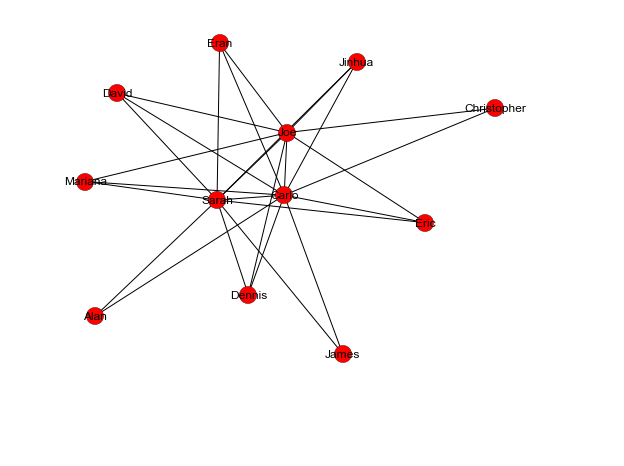

In [5]:
# note that there is a lot of freedom in providing edge metadata.
# also, the relationships strengths are completely random.
# edge can have unlimited properties
G.add_edge('Sarah','Jinhua',relationshipStrength=2)
G.add_edge('Sarah','Mariana',relationshipStrength=10)
G.add_edge('Sarah','Eran',relationshipStrength=20)
G.add_edge('Sarah','Alan',relationshipStrength=5)
G.add_edge('Sarah','Joe', relationshipStrength=30)
G.add_edge('Sarah','Dennis',relationshipStrength=5)
G.add_edge('Sarah','David',relationShipStrength=10)
G.add_edge('Sarah','Eric',relationshipStrength=5)
G.add_edge('Sarah','Carlo', relationshipStrength=20)
G.add_edge('Sarah','James',relationshipStrength=5)

print "Sarah-Alan edge: "+str(G['Sarah']['Alan'])

G.add_edge('Carlo','Jinhua',relationshipStrength=2)
G.add_edge('Carlo','Mariana',relationshipStrength=10)
G.add_edge('Carlo','Eran',relationshipStrength=20)
G.add_edge('Carlo','Alan',relationshipStrength=5)
G.add_edge('Carlo','Joe', relationshipStrength=30)
G.add_edge('Carlo','Dennis',relationshipStrength=5)
G.add_edge('Carlo','David',relationShipStrength=10)
G.add_edge('Carlo','Eric',relationshipStrength=5)
G.add_edge('Carlo','Sarah', relationshipStrength=20)
G.add_edge('Carlo','James',relationshipStrength=5)
G.add_edge('Carlo','Christopher',relationshipStrength=5)

G.add_edge('Joe','Jinhua',relationshipStrength=2)
G.add_edge('Joe','Mariana',relationshipStrength=10)
G.add_edge('Joe','Eran',relationshipStrength=20)
G.add_edge('Joe','Dennis',relationshipStrength=5)
G.add_edge('Joe','David',relationShipStrength=10)
G.add_edge('Joe','Eric',relationshipStrength=5)
G.add_edge('Joe','Sarah', relationshipStrength=20)
G.add_edge('Joe','Carlo',relationshipStrength=5)
G.add_edge('Joe','Christopher',relationshipStrength=5)

plt.figure(figsize=(8,6));
#telling matplotlib/networkx where to put the notes; this time using a built in layout
#in our node data P will be lat longs
P = nx.spring_layout(G);
print P
nx.draw(G,pos=P);
nx.draw_networkx_labels(G,pos=P); 

Accessing different network properties is very simple. Additionaly, NetworkX implements a number of network analysis algorithms such as centrality. The **degree distribution** is a 'thumb-print' that allows us to understand the structure and dynamics of a networked system.

In [6]:
degrees = nx.degree(G)
print "All degrees: "+str(degrees)
print degrees['Alan']
print "degree of Mariana: "+str(G.degree('Mariana'))
D = degrees.values()

All degrees: {'Sarah': 10, 'Mariana': 3, 'Eran': 3, 'James': 2, 'Jinhua': 3, 'Alan': 2, 'David': 3, 'Christopher': 2, 'Joe': 9, 'Dennis': 3, 'Carlo': 11, 'Eric': 3}
2
degree of Mariana: 3


**NetworkX** has a number of plotting functions built-in. Apart from drawing nodes and edges, a number of the objects returned by the network functions are `numpy.arrays`, `dicts` or `lists` that can be easily passed to a **Matplotlib** function to represent them.

[10, 3, 3, 2, 3, 2, 3, 2, 9, 3, 11, 3]


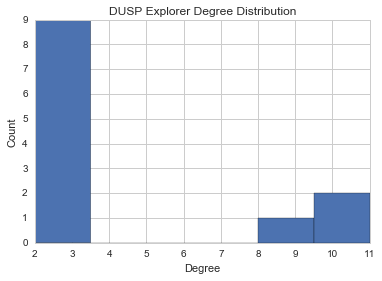

In [7]:
#this is seaborn function
sns.set_style("whitegrid")
plt.figure()

#we will be plotting hte Degrees that we stored in variable D
# 6 here is the number of bins 
plt.hist(D,6)
print D
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('DUSP Explorer Degree Distribution')
# Answer:
# As n gets large, degree dist is a Poisson distribution.
plt.show()

#with matplotlib you can save as PNG

### 2. Riyadh Road Network

For Riyadh, we have a number of **empirical** datasets that represent a number of network types. While **NetworkX** provides a number of functions to generate network models that may be used to approximate and study real-world networks, we will be utilizing and constructing empirical networks. Instead of procedurally creating the networks, or utilizing models, we will read in network data. Network data can have **many** different formats, different file types require different functions to be called, and can be parsed differently. Here, we will utilize a network stored as two separate files: the first file is a node file and contains metadata for the nodes' geographical location; the second file describes the edges by containing pairs of nodes, and contains a number of additional information describing the edge's properties.

In the given network, the **nodes** represent road intersections and the **edges** represent the actual roads. The dataset represents the routing results, and is based on the CDR data obtained during a month in Riyadh. 

First, we will read in the data. While **NetworkX** has a number of built-in functions to import data, and directly construct a network, our data doesn't follow their requirements. We will parse it through **pandas**, and then we will build the network procedurally. We can first import either the **nodes** or the **edges**. In our case, we don't really need the **nodes** to construct the network. 

In [20]:
#there are three different edge files in data folder: am, md, pm
df = pd.read_csv("data/riyadh_route_edges_am.txt", sep=" ", index_col=0)
df

#will be using source and target to make edges
# Let's define an empty undirected graph.
RG = nx.Graph()

# We also define the values for the edge attributes
keys = ['volume', 'capacity', 'voc', 'degree', 'free_travel_time', 'travel_time']
i = 0
for row in df.itertuples(index=0):
    i +=1
    #itertuples returns a tuple, or a type of list for every row in the data frame 
    # If we use all the nodes, plotting the network takes a very long time!
    if i < 3000:
        #row comes from data frame and we are capturing columns 2 to the end
        values = row[2:]
        # We create a dictionary with the keys and row values
        #zip is creating a list that weaves the "Keys or names" and "values" together such that the header
        # is matched to each element AND we are putting that list in as a Dict  
        edge_attributes = dict(zip(keys, values))
        # We add the edge to the graph
        # Asterisk allows you to put in a list and tells it to look in there for the arguements 
        RG.add_edge(*(row[0], row[1]), attr_dict=edge_attributes)
degrees = nx.degree(RG)



We will be using the built-in plotting function. We can specify a number of visual properties and parameterize them according to network properties such as `degree`. However, since we haven't imported the X,Y location of the nodes, we cannot plot them in a spatially consistent manner. You can find out more about the functions on the [**API**](https://networkx.github.io/documentation/latest/reference/drawing.html)

> Don't get lines in output. Should we?

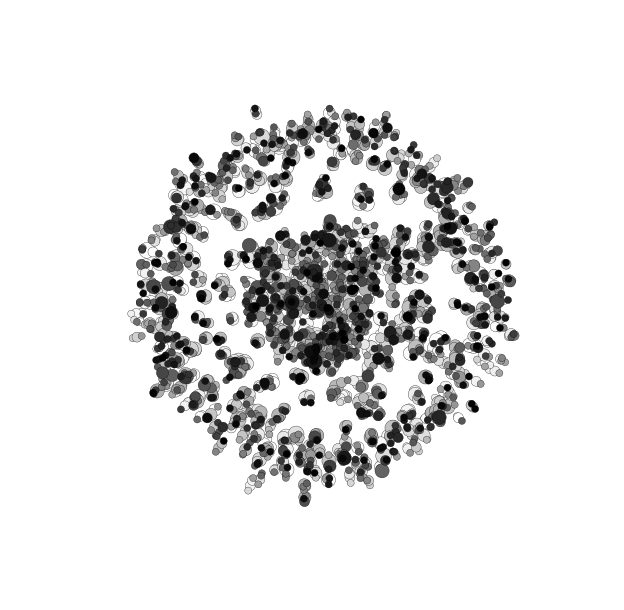

In [9]:
plt.figure(figsize=(8,8))
P = nx.spring_layout(RG)

node_sizes = [v * 50 for v in degrees.values()]
node_colors = range(len(RG.nodes()))
nx.draw(RG, pos=P, node_size=node_sizes, width=.5, node_color=node_colors)

Similarly, we can utilize some of the network properties and `Matplotlib` or `Seaborn` to create some exploratory visualizations. 

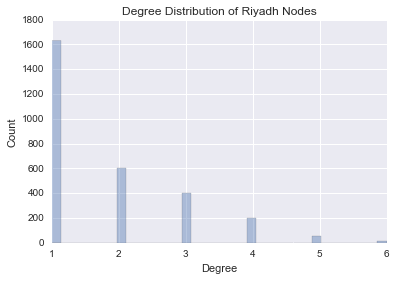

In [10]:
sns.set_style("darkgrid")
plt.figure()
sns.set_style("darkgrid")
sns.distplot(degrees.values(), kde=False)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Degree Distribution of Riyadh Nodes')

plt.show()

When a network is **connected**, we can compute additional properties such as **shortest paths**. The `shortest_path` function  computes the shortest paths in the graph, returning paths that include both the source and target in the path.

In [11]:
# If I pick any two intersections, is it possible to find a route 
# between them? Check if the network is connected.
print "Is the road network connected? "+str(nx.is_connected(RG))

paths = nx.shortest_path(RG)
print "All paths from node-100: "+str(paths[100])
print "Length of path from node 0 to node 18 is "+str(len(paths[100][2093]))

Is the road network connected? False
All paths from node-100: {193: [100, 194, 193], 194: [100, 194], 99: [100, 99], 100: [100], 5701: [100, 194, 193, 5701], 6920: [100, 194, 622, 6920], 1741: [100, 194, 622, 623, 1741], 622: [100, 194, 622], 623: [100, 194, 622, 623], 9137: [100, 194, 622, 627, 9137], 626: [100, 194, 622, 627, 626], 627: [100, 194, 622, 627], 2093: [100, 194, 622, 627, 626, 2093], 2711: [100, 2711]}
Length of path from node 0 to node 18 is 6


#### Plotting the Nodes with Geographical Location

We can easily extract the information from the `riyadh_nodes.txt` file, and match them with their **IDs**. In order to spevify a geo-location for the nodes, we need to construct a dictionary, where the `keys` match the **IDs** of the **nodes**, and the value is a tuple with a X/Y value. 

In [18]:
nodes_df = pd.read_csv("data/riyadh_nodes.txt", sep=" ", index_col=0)

loc_dict = {}
for node_index in RG.nodes():
    loc_dict[node_index] = (float(nodes_df.loc[[node_index]]['st_x']), float(nodes_df.loc[[node_index]]['st_y']))

print loc_dict[11]

(46.747106582781704, 24.645511965058603)


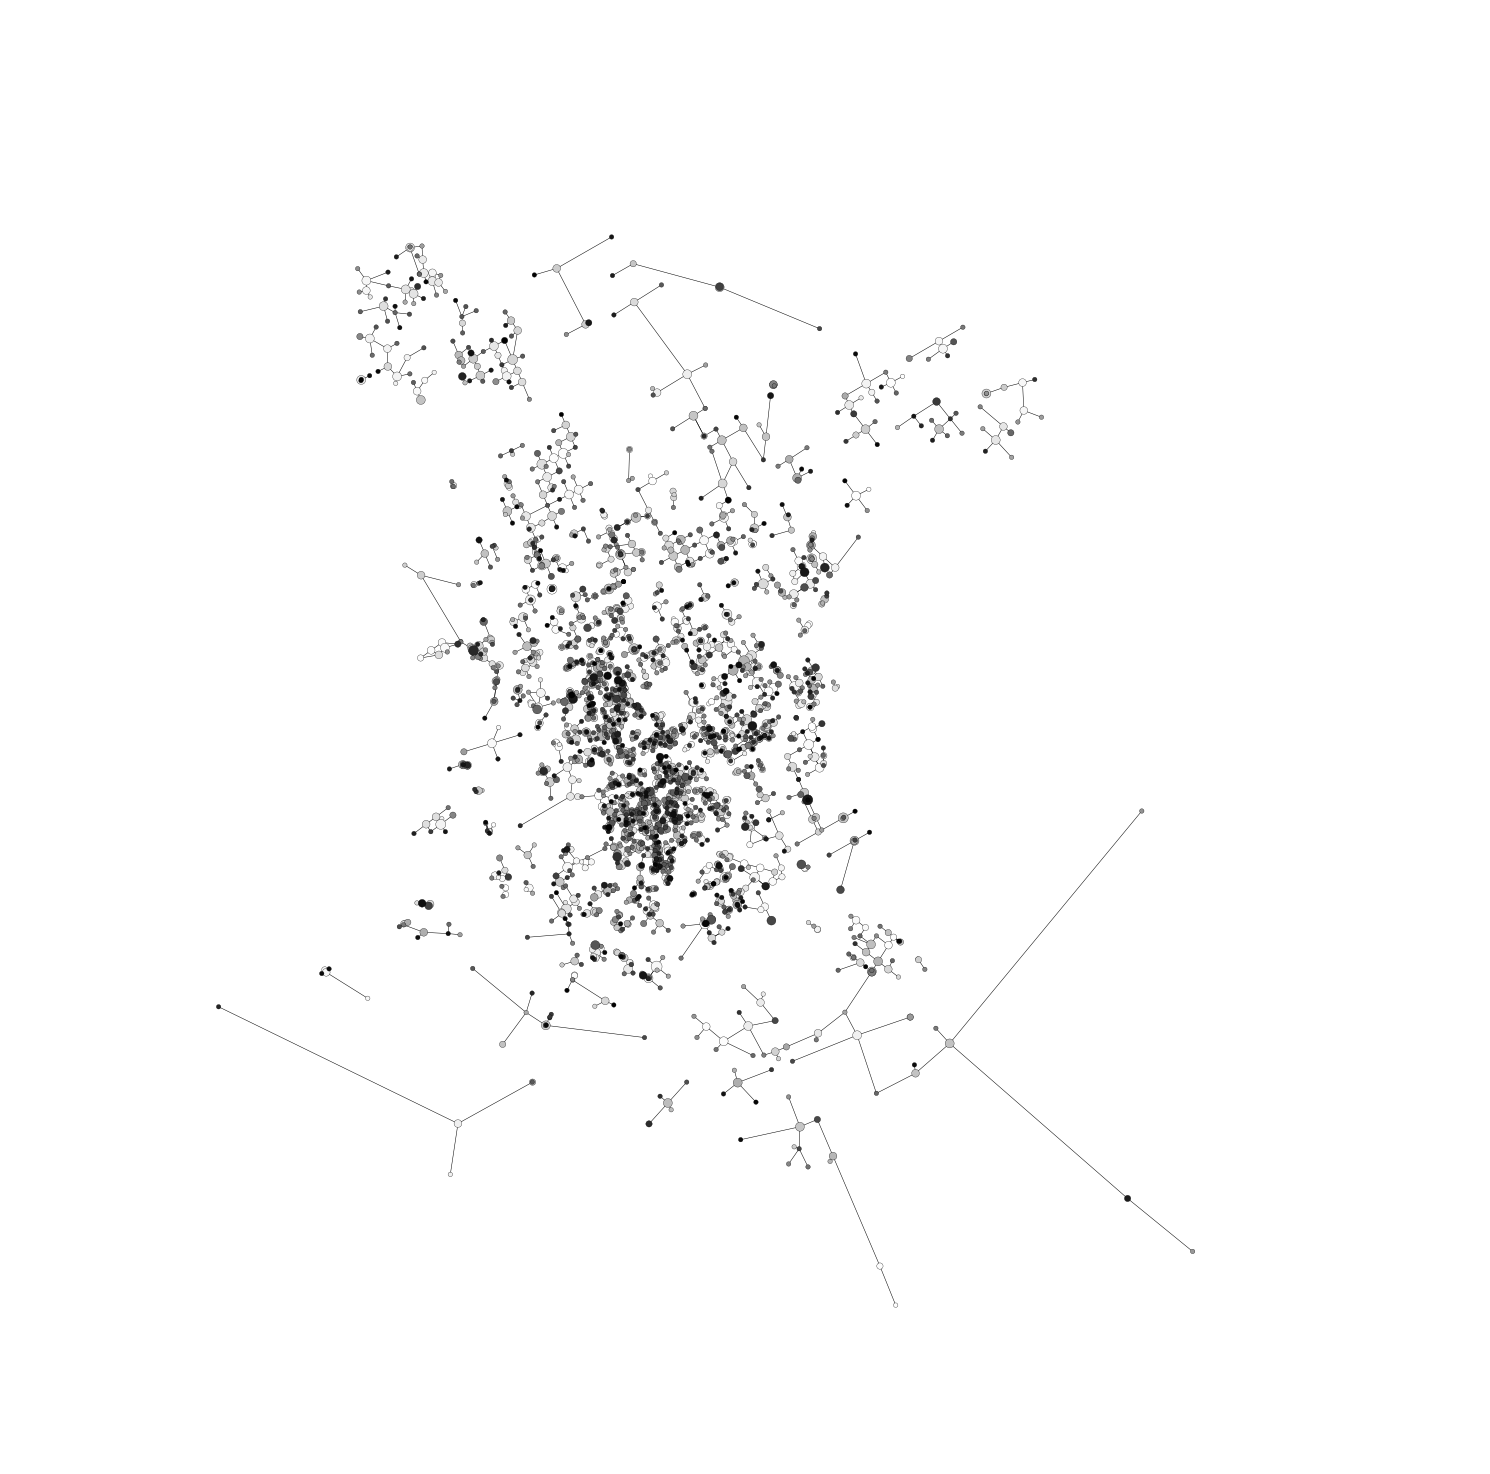

In [12]:
plt.figure(figsize=(20,20))

node_sizes = [v * 20 for v in degrees.values()]
node_colors = range(len(RG.nodes()))
nx.draw(RG, pos=loc_dict, node_size=node_sizes, width=.5, node_color=node_colors);

Lets plot some additional **edge** properties. 

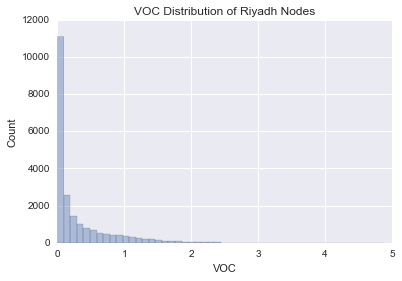

In [13]:
sns.set_style("darkgrid")
sns.distplot(df['voc'], kde=False)

plt.xlabel('VOC')
plt.ylabel('Count')
plt.title('VOC Distribution of Riyadh Nodes')

A **boxplot** is a convenient way of graphically depicting groups of numerical data through their quartiles. **Outliers** may be plotted as individual points. `Seaborn` provides a convenient way to construct **boxplots**.

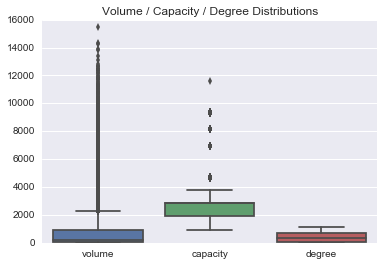

In [14]:
sns.set_style("darkgrid")
ax = sns.boxplot(data=df[['volume', 'capacity','degree']])
plt.title('Volume / Capacity / Degree Distributions')

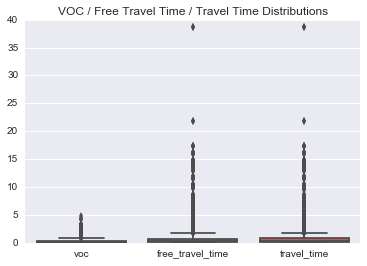

In [15]:
sns.set_style("darkgrid")
ax = sns.boxplot(data=df[['voc', 'free_travel_time','travel_time']])
plt.title('VOC / Free Travel Time / Travel Time Distributions')

### In-Class Exercise

As you may have noticed, we have multiple `.txt` files with congestion results for multiple times of the day. Import all the files and for each of them, create a different `Dataframe`. Now, for each of them, create a histogram showing their **VOC** values, and one for the **travel_time**. Each histogram should contain the 4 different datasets.

In [16]:
# VOC

In [17]:
# Travel_time